<a href="https://colab.research.google.com/github/Jayaprakash1710/Business-Analytics---IITM/blob/main/BA_GA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('/content/data_transform.xlsx - data_1.csv')
df.head()

,Sales,Price
0,53,1.0
1,12,3.4
2,15,3.3
3,27,1.4
4,8,3.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   50 non-null     int64  
 1   Price   50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


In [6]:
df.describe()

,Sales,Price
count,50.0000,50.000000
mean,31.5600,2.284000
std,28.7673,0.984235
min,6.0000,0.800000
25%,14.2500,1.325000
50%,20.0000,2.350000
75%,40.7500,3.275000
max,145.0000,3.700000


In [7]:
df.shape

(50, 2)

In [8]:
import seaborn as sns

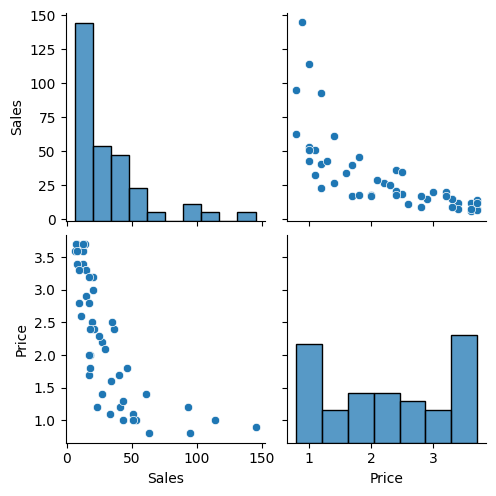

In [9]:
sns.pairplot(df)

In [10]:
import statsmodels.formula.api as smf

# Part-1

Q1

In [11]:
model = smf.ols(formula="Sales ~ Price", data=df).fit()

# Print the R-squared value rounded to 4 decimal places
r_squared = round(model.rsquared, 4)
print("R-squared Value:", r_squared)

R-squared Value: 0.5264


Q2

In [12]:
# Get the p-value of the overall model (F-statistic p-value)
p_value = round(model.f_pvalue, 4)
print("Model p-value:", p_value)

# Determine significance
if p_value < 0.05:
    print("Answer: Yes (The model is significant)")
elif p_value >= 0.05:
    print("Answer: No (The model is not significant)")
else:
    print("Answer: Cannot say (Need more data for concluding)")


Model p-value: 0.0
Answer: Yes (The model is significant)


Q3

In [13]:
# Get the intercept (constant term β0) and round to 4 decimal places
intercept = round(model.params['Intercept'], 4)
print("Intercept (β0):", intercept)

Intercept (β0): 79.9927


Q4

In [14]:
# Get the slope (coefficient of Price) and round to 4 decimal places
slope = round(model.params['Price'], 4)
print("Slope (β1):", slope)

Slope (β1): -21.2052


Q5

In [15]:
import numpy as np

df['Log_Price'] = np.log(df['Price'])

log_model = smf.ols(formula="Sales ~ Log_Price", data=df).fit()

r_squared_log = round(log_model.rsquared, 4)
print("R-squared Value (After Log Transformation):", r_squared_log)

R-squared Value (After Log Transformation): 0.6003


Q6

In [16]:
# Get the p-value of the overall log-transformed model (F-statistic p-value)
p_value_log = round(log_model.f_pvalue, 4)
print("Model p-value (After Log Transformation):", p_value_log)

# Determine significance
if p_value_log < 0.05:
    print("Answer: Yes (The model is significant)")
elif p_value_log >= 0.05:
    print("Answer: No (The model is not significant)")
else:
    print("Answer: Cannot say (Need more data for concluding)")


Model p-value (After Log Transformation): 0.0
Answer: Yes (The model is significant)


Q7

In [17]:
# Get the intercept (β0) of the log-transformed model and round to 4 decimal places
intercept_log = round(log_model.params['Intercept'], 4)
print("Intercept (β0) After Log Transformation:", intercept_log)

Intercept (β0) After Log Transformation: 64.2649


Q8

In [18]:
# Get the slope (coefficient of Log_Price) and round to 4 decimal places
slope_log = round(log_model.params['Log_Price'], 4)
print("Slope (β1) After Log Transformation:", slope_log)

Slope (β1) After Log Transformation: -45.5152


# Part-2

In [20]:
# Load the data
X = pd.read_csv('/content/X.xlsx - Sheet1.csv')
y = pd.read_csv('/content/y.xlsx - Sheet1.csv')

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Safety Features    50 non-null     float64
 1   Tech Features      50 non-null     float64
 2   Marketing Spend    50 non-null     float64
 3   Premium Hatchback  50 non-null     int64  
 4   SUV                50 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 2.1 KB


In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Profit  50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


In [24]:
X.head()

,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
0,175349.20,116897.80,491784.10,0,1
1,172597.70,131377.59,463898.53,0,0
2,163441.51,81145.55,427934.54,1,0
3,154372.41,98671.85,403199.62,0,1
4,152107.34,71391.77,386168.42,1,0


In [25]:
y.head()

,Profit
0,227261.83
1,226792.06
2,226050.39
3,217901.99
4,201187.94


In [26]:
y = y.squeeze()
print(y)

0     227261.83
1     226792.06
2     226050.39
3     217901.99
4     201187.94
5     191991.12
6     191122.51
7     190752.60
8     187211.77
9     184759.96
10    181121.95
11    179259.40
12    176585.52
13    169307.35
14    167602.65
15    164917.04
16    161992.93
17    160370.37
18    159266.90
19    157776.86
20    153474.03
21    146313.02
22    145352.25
23    143733.99
24    143552.04
25    142404.34
26    140733.54
27    140008.31
28    138282.38
29    136004.64
30    134937.59
31    132483.56
32    132427.84
33    131778.92
34    131712.80
35    131479.51
36    125708.19
37    124949.14
38    116229.06
39    116005.76
40    113239.91
41    112798.83
42    106498.49
43    104758.98
44    100200.33
45     99926.08
46     84490.75
47     77559.73
48     70673.41
49     49681.40
Name: Profit, dtype: float64


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 83502864.03257743


Q-9

In [29]:
# Calculate and print the R-squared value
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

R-squared: 0.9347


Q-10

In [30]:
# Print the intercept value
intercept = model.intercept_
print(f'Intercept: {intercept:.4f}')

Intercept: 69744.9871


Q-11

In [31]:
new_data = np.array([[1315.46, 115816.21, 297114.46, 1, 0]])
predicted_profit = model.predict(new_data)
print(f'Predicted Profit: {predicted_profit[0]:.4f}')

Predicted Profit: 84489.1056


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
